Found 41 files belonging to 4 classes.
Class Names:  ['glioma', 'meningioma', 'notumor', 'pituitary']
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2024-09-29 22:53:46.182913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


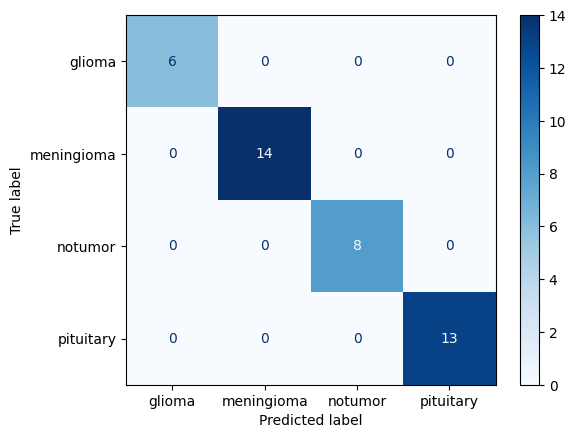

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Load the saved .keras model
model = tf.keras.models.load_model('models/resnet-tuned.keras')

# Step 2: Use image_dataset_from_directory
uploads_folder = 'uploads'

# Define the image size expected by your model
img_height = 128  # adjust based on your model
img_width = 128

# Load dataset with inferred labels based on directory structure
batch_size = 32
upload_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    uploads_folder,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # Keep this False to preserve the order
)

# Get the class names from the dataset (based on folder names)
class_names = upload_dataset.class_names
print("Class Names: ", class_names)

# Step 3: Make predictions
predictions = []
true_labels = []  # Store the true labels from the dataset

for images, labels in upload_dataset:
    preds = model.predict(images)
    predicted_classes = np.argmax(preds, axis=-1)
    predictions.extend(predicted_classes)
    true_labels.extend(labels.numpy())  # Extract the true labels

# Step 4: Generate the confusion matrix
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Step 5: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

